In [1]:
import os
import cv2 as cv
from pathlib import Path
from PIL import Image

In [2]:
dir_path = 'F:/Know_I/groceries/freiburg_groceries_dataset/images/'

paths = os.listdir(dir_path)
path_list = []
for path in paths:
    path_dict = {}
    l_path = path.lower()
    path_dict = {l_path: dir_path+path}
    path_list.append(path_dict)
print(path_list)
#l_path --> object
#path --> path of each category in the DIR_LIB Directory

[{'beans': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/BEANS'}, {'cake': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CAKE'}, {'candy': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CANDY'}, {'cereal': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CEREAL'}, {'chips': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CHIPS'}, {'chocolate': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CHOCOLATE'}, {'coffee': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/COFFEE'}, {'corn': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CORN'}, {'fish': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/FISH'}, {'flour': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/FLOUR'}, {'honey': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/HONEY'}, {'jam': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/JAM'}, {'juice': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/JUICE'}, {'milk': 'F:/Know_I/groceries/freib

In [3]:
row = 150
col = 150
channel = 3
X = []
y = []

In [4]:
def corresponding_label(label, image):
    return str(label)
#why corresponding_label function?? TO ensure the label assignments occur properly

In [5]:
from tqdm import tqdm #to increase iteration speed

In [6]:
#to create the training data we will be working on
def training_data(label, image_dir):
    images = os.listdir(image_dir)
    for image in tqdm(images):
        image_path = os.path.join(image_dir, image)
        label = corresponding_label(label, image)
        X.append(cv.resize(cv.imread(image_path, cv.IMREAD_COLOR), (row, col), interpolation=cv.INTER_CUBIC)) #scale and into X
        y.append(label)

In [7]:
def read_and_process(path_list):
    for path in tqdm(path_list):
        for label in path:
            training_data(label, path[label])
        del path
    del path_list

In [8]:
read_and_process(path_list)

 89%|██████████████████████████████████████████████████████████████████████▍        | 248/278 [00:01<00:00, 144.47it/s]


 32%|██████████████████████████▌                                                        | 8/25 [00:13<00:26,  1.53s/it]


  0%|                                                                                          | 0/162 [00:00<?, ?it/s]


 34%|███████████████████████████                                                     | 60/177 [00:00<00:00, 143.23it/s]


 73%|█████████████████████████████████████████████████████████▋                     | 125/171 [00:01<00:00, 111.65it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:35<00:00,  1.43s/it]


In [9]:
import gc

In [10]:
gc.collect()

512

In [15]:
import matplotlib.pyplot as plt

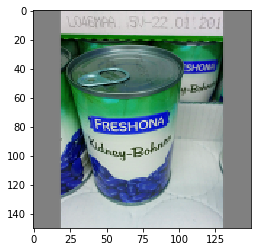

In [16]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5, 15)
plt.imshow(X[0])

In [45]:
X[0]

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]]

In [46]:
y[0]

'beans'

In [47]:
print('X length: ',len(X))
print('y length: ',len(y))
#we have 4947 items (close to 10,000)

X length:  4947
y length:  4947


In [48]:
import numpy as np

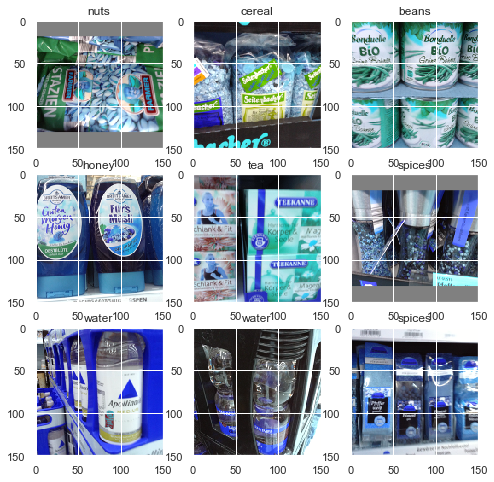

In [49]:
fig, ax = plt.subplots(3,3)
fig.set_size_inches(8, 8)
for i in range(3):
    for j in range(3):
        k = np.random.randint(0, len(y))
        ax[i, j].imshow(X[k])
        ax[i, j].set_title(y[k])

In [50]:
import seaborn as sns

Text(0.5, 1.0, 'Quantity')

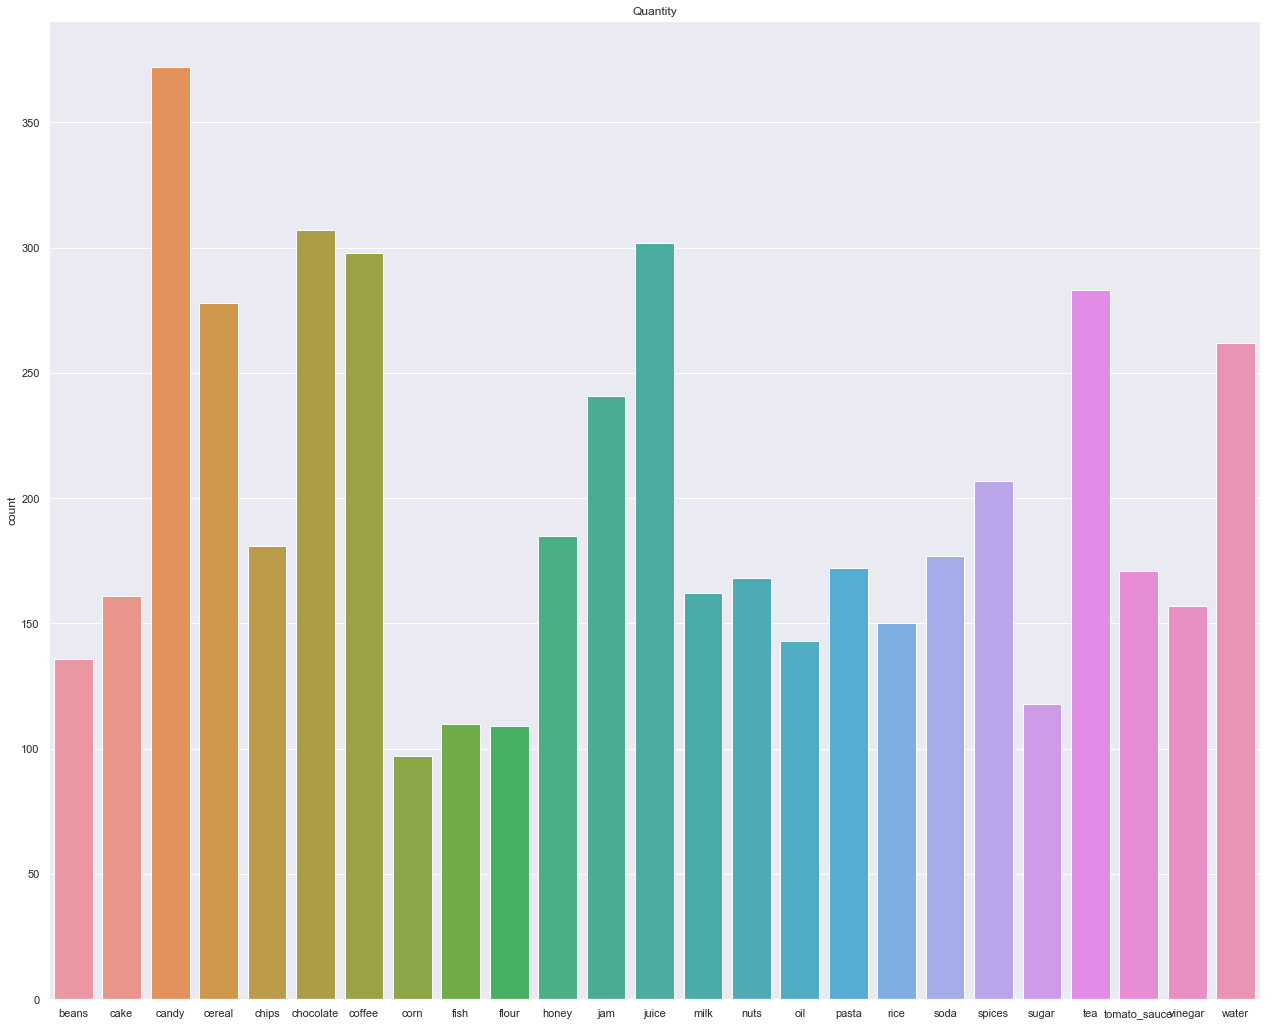

In [51]:
sns.countplot(y)
sns.set(rc={'figure.figsize':(21.7,18.0)}, font_scale=1)
plt.title('Quantity')

In [22]:
#conclusion: most data for candy, least data for corn... this is a classic imbalanced classification problem 
#This can be handled by Data Augmentation

In [23]:
#to reduce bias during validation, we split the data before augmenting it
from sklearn import preprocessing, model_selection
label_maker = preprocessing.LabelEncoder()
y = label_maker.fit_transform(y)

In [24]:
print(np.unique(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


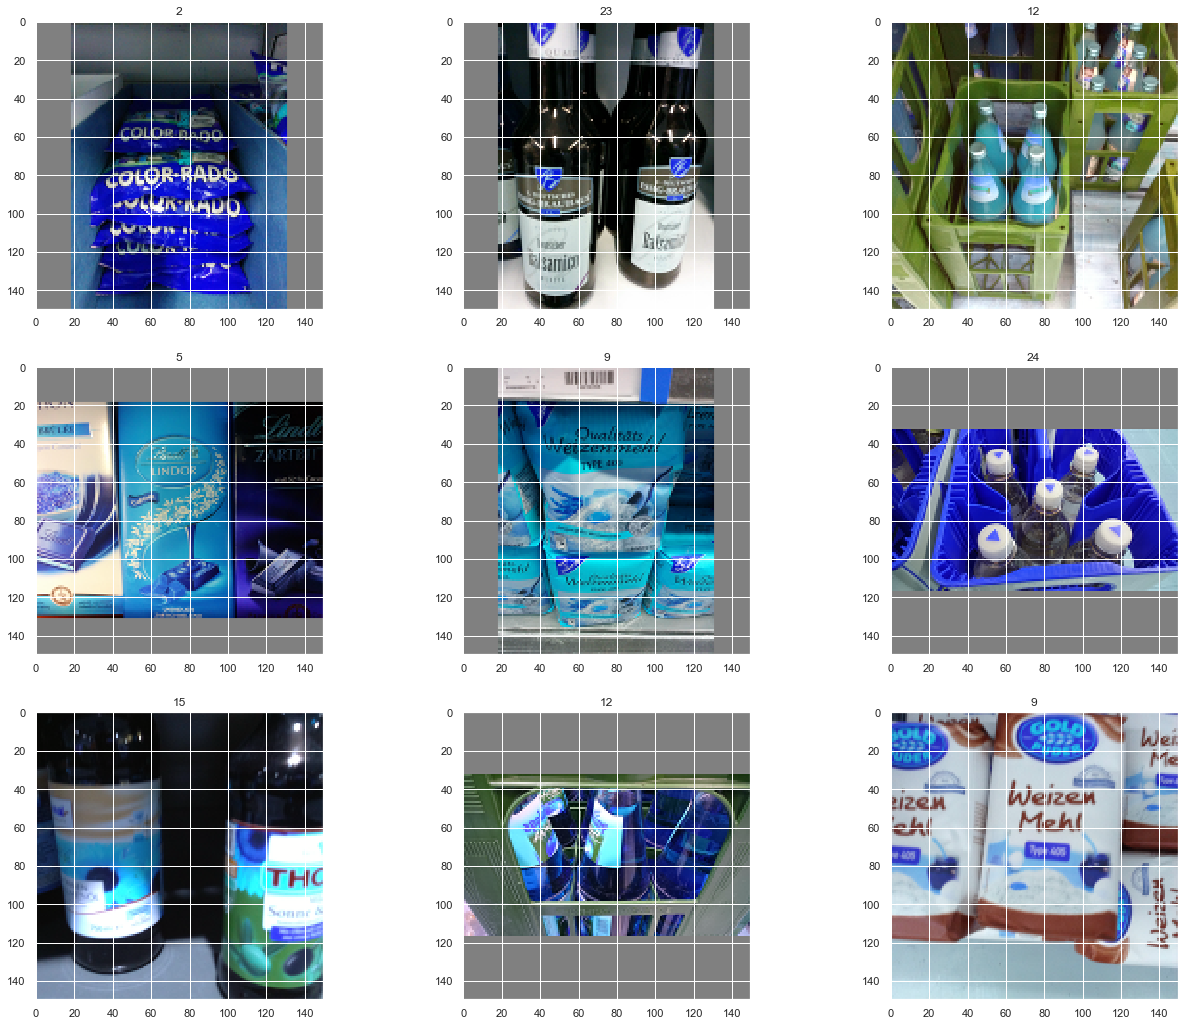

In [25]:
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        k = np.random.randint(0, len(y))
        ax[i, j].imshow(X[k])
        ax[i, j].set_title(y[k])

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.1, random_state=56)

In [27]:
gc.collect()

17236

In [28]:
#Data Augmentation: is a technique generally used to increase data size
#Data Augmentation: increases generality, thus making predictions more reliable

In [29]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [30]:
generator = ImageDataGenerator(rotation_range=0.1, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               zoom_range=0.2, 
                               horizontal_flip='True', 
                               vertical_flip='True',
                               validation_split=0.2
                              )

In [31]:
generator.fit(X_train)